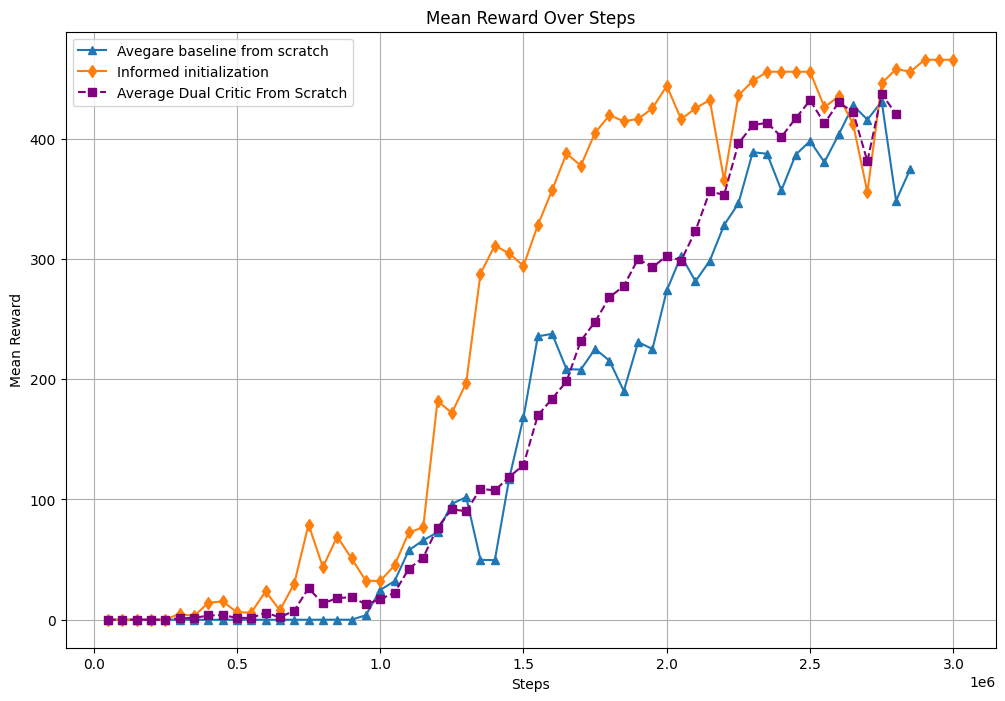

In [8]:
import re
import matplotlib.pyplot as plt

# Paths to the log files
log_file_path1 = '/home/rmarr/Projects/visibility-game-env/4-22/run-20250422_204305-o1sw4bcp/files/output.log'
log_file_path2 = '/home/rmarr/Projects/visibility-game-env/4-22/run-20250422_204305-o1xikaju/files/output.log'
log_file_path3 = '/home/rmarr/Projects/visibility-game-env/4-22/run-20250422_204305-o4lm9u6h/files/output.log'
log_file_path4 = '/home/rmarr/Projects/visibility-game-env/4-22/test/files/output.log'

def extract_rewards(log_file_path):
    steps = []
    mean_rewards = []
    reward_pattern = re.compile(r'Step: (\d+).+Mean Reward: ([\d.]+)')
    
    with open(log_file_path, 'r') as file:
        for line in file:
            match = reward_pattern.search(line)
            if match:
                step = int(match.group(1))
                mean_reward_str = match.group(2).rstrip('.')
                mean_reward = float(mean_reward_str)
                steps.append(step)
                mean_rewards.append(mean_reward)
    
    return steps, mean_rewards

# Extract data from all log files
steps1, mean_rewards1 = extract_rewards(log_file_path1)
steps2, mean_rewards2 = extract_rewards(log_file_path2)
steps3, mean_rewards3 = extract_rewards(log_file_path3)
steps4, mean_rewards4 = extract_rewards(log_file_path4)

# Calculate the average mean reward
average_rewards = [(r1 + r2 + r3 + r4) / 4 for r1, r2, r3, r4 in zip(mean_rewards1, mean_rewards2, mean_rewards3, mean_rewards4)]

# Plot the mean rewards and their average
plt.figure(figsize=(12, 8))
#plt.plot(steps1, mean_rewards1, marker='o', linestyle='-', label='Log 1 Mean Reward')
#plt.plot(steps2, mean_rewards2, marker='x', linestyle='-', label='Log 2 Mean Reward')
plt.plot(steps3, mean_rewards3, marker='^', linestyle='-', label='Avegare baseline from scratch')
plt.plot(steps4, mean_rewards4, marker='d', linestyle='-', label='Informed initialization')
plt.plot(steps1, average_rewards, marker='s', linestyle='--', label='Average Dual Critic From Scratch', color='purple')
plt.title('Mean Reward Over Steps')
plt.xlabel('Steps')
plt.ylabel('Mean Reward')
plt.legend()
plt.grid(True)
plt.show()